## Couple acting on
https://docs.google.com/document/d/1YfsYZhCuaXZhf-j-ee1n9jhuklImPUdFfUcHzvb6jEU/edit



Consider an infinite half space $x \geq 0$. A point load is acting vertically at the origin and another point load of the same magnitude, $P$ is acting vertically in the opposite direction at a small distance $a$ from the origin. These two forces together make a couple acting on the origin

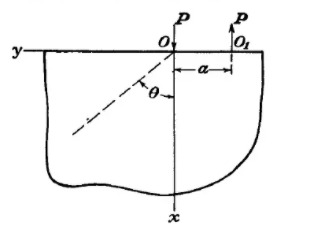

**Polar Utilities**

In [ ]:
from sympy import *
from IPython.display import Math, Latex
init_printing()

r, theta = symbols('r, theta')

delr_delx = cos(theta)

delr_dely = sin(theta)

deltheta_delx = -sin(theta)/r

deltheta_dely = cos(theta)/r

def del_delx(f):
    return delr_delx*diff(f,r) + deltheta_delx*diff(f,theta)

def del_dely(f):
    return delr_dely*diff(f,r) + deltheta_dely*diff(f,theta)

def del2_delx2(f):
    return del_delx(del_delx(f))

def del2_dely2(f):
    return del_dely(del_dely(f))

def polarLapacian(f):
    return (del2_delx2(f) + del2_dely2(f)).simplify()

def  polarbiharmonic(f):
    return polarLapacian(polarLapacian(f))

def sigma_xx(f):
    return del2_dely2(f)

def sigma_yy(f):
    return del2_delx2(f)

def sigma_xy(f):
    return -del_delx(del_dely(f))

def sigma_rect(f):
    return Matrix([[sigma_xx(f), sigma_xy(f)],[sigma_xy(f), sigma_yy(f)]])

Q = Matrix([[cos(theta), sin(theta)],[-sin(theta), cos(theta)]])

def sigma_polar(f):
    return Q*sigma_rect(f)*(Q.T)

def sigma_rr(f):
    return sigma_polar(f)[0,0].simplify().expand()

def sigma_tt(f):
    return sigma_polar(f)[1,1].simplify()

def sigma_rt(f):
    return sigma_polar(f)[0,1].simplify().expand()

def sigma_tr(f):
    return sigma_polar(f)[1,0].simplify().expand()

First we find Airy Stress function when a point load, $P$ acts vertically on the infinite half space.
First, we note that if we consider a semi-circle around the origin, then the following "force-balance" must hold:

\begin{gather}
\int_{-\pi/2}^{\pi/2} \sigma_{rr} \cos\theta \; r {\rm d} \theta = - P
\end{gather}

Now, in the RHS there is a constant value and in the LHS there is an integration with respect to $\theta$ while in the integrand, there is an $r$-dependence. Now, the only possibile way in which this $r$-dependence can disappear is if $\sigma_{rr}$ is proportional to $\displaystyle \frac{1}{r}$. Thus, $\sigma_{rr}$ must be of the form $\displaystyle \sigma_{rr} = \frac{h(\theta)}{r}$, where it is important to note that $h(\theta)$ must be symmetric in $\theta$ about $\theta = 0$. This form of $\sigma_{rr}$ can be used to motivate the form of the Airy stress function. 

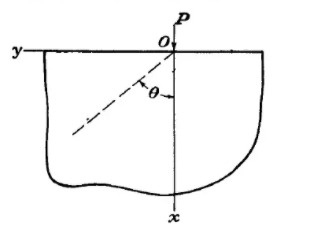

First, we write the expression of $\sigma_{rr}$ in terms of a generic Airy stress function

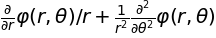

In [ ]:
phi = Function('varphi')(r,theta)
sigma_rr(phi)

So, if our unknown Airy stress function is $\varphi$, we must have:

\begin{gather*}
\frac{1}{r} \frac{\partial \varphi}{\partial r} + \frac{1}{r^2} \frac{\partial^2 \varphi}{\partial \theta^2} = \frac{h(\theta)}{r}, 
\end{gather*}

from which we obtain:
\begin{gather*}
\frac{\partial \varphi}{\partial r} + \frac{1}{r} \frac{\partial^2 \varphi}{\partial \theta^2} = h(\theta). 
\end{gather*}

From the above, we can deduce that $\varphi$ must be of the form $\varphi = r g(\theta)$.

In [ ]:
g = Function('g')(theta)
phi = r*g

from IPython.display import Math, Latex
display(Math(r'\varphi = {}'.format(latex(phi))))

<IPython.core.display.Math object>

Next, we solve the biharmonic of this $\phi$:

In [ ]:
dsolve(polarbiharmonic(phi),g)

We rewrite $g(\theta)$ in a slightly different form as follows:

In [ ]:
A, B, C, D = symbols('A, B, C, D')
gnew = A*cos(theta) + B*theta*cos(theta) + C*sin(theta) + D*theta*sin(theta)
display(Math(r'g(\theta) = {}'.format(latex(gnew))))

<IPython.core.display.Math object>

Next, we find the expressions of $\sigma_{rr}$, $\sigma_{\theta\theta}$, and $\sigma_{r\theta}$ as follows:

In [ ]:
phi = r*gnew
sigmarr = sigma_rr(phi)
display(Math(r'\sigma_{{rr}} = {}'.format(latex(sigmarr))))

sigmatt = sigma_tt(phi)
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(latex(sigmatt))))

sigmart = sigma_rt(phi)
display(Math(r'\sigma_{{r\theta}} = {}'.format(latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Comparing the form of $\sigma_{rr}$ just obtained with the previous general form $\displaystyle \sigma_{rr} = \frac{h(\theta)}{r}$, we find that $h(\theta) = -2B\sin\theta + 2D\cos\theta$. But we had already noted that $h(\theta)$ must be symmetric in $\theta$ about $\theta=0$. Therefore, we must have $B=0$. Consequently, the expression of $\sigma_{rr}$ becomes:

In [ ]:
sigmarr = sigmarr.subs(B,0)
display(Math(r'\sigma_{{rr}} = {}'.format(latex(sigmarr))))

<IPython.core.display.Math object>

The unknown $D$ can be readily found by using the "force-balance" condition. Thus, we have:

In [ ]:
P = symbols('P')
lhs = integrate(r*sigmarr*cos(theta),(theta,-pi/2,pi/2))
rhs = -P
eq = Eq(lhs,rhs) 
display(eq)

The solution for $D$ can be easily found now:

In [ ]:
Dsoln = -P/pi
display(Math(r'D = {}'.format(latex(Dsoln))))

<IPython.core.display.Math object>

At last, we can find our Airy stress function $\phi$ by substituting $B = 0$, $D = \frac{-P}{\pi}$:

In [ ]:
phi_final = r*gnew.subs(B,0).subs(D,Dsoln)
display(Math(r'\varphi = {}'.format(latex(phi_final))))

<IPython.core.display.Math object>

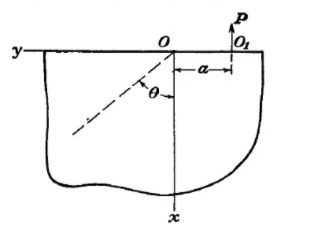

Next, we consider the case when force P alone is acting at a small distance $a$ away from origin. 
First, we note that airy stress function can be written equivalently in the form of $x$ and $y$:
\begin{gather*}
\phi(r,\theta) \equiv \phi(x,y)
\end{gather*}
Since the force is acting at $y = -a$ in opposite direction, airy stress function for this case will be:
\begin{gather*}
-\phi(x, y+a)
\end{gather*}

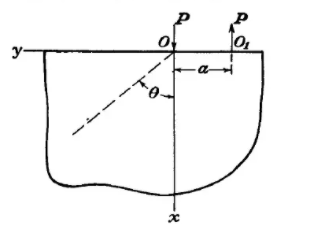

Because of linear nature of biharmonic equation, it follows the principle of superposition. So, airy stress function when two vertical loading are applied in the above fashion will be:
\begin{gather*}
\phi_{1}(x,y) = \phi(x,y)-\phi(x, y+a)
\end{gather*}
<br>

When $a$ is very small, we can write:
\begin{gather*}
\phi_{1}(x,y) = \lim_{a\to 0} \frac{\phi(x, y+a)-\phi(x,y)}{a} * (-a)
\end{gather*}
<br>
So, we get
\begin{gather*}
\phi_{1}(x,y) = -a\frac{\partial}{\partial y}\phi(x,y)
\end{gather*}
<br>
This can be equivalently written in polar form as
\begin{gather*}
\phi_{1}(r,\theta) = -a\frac{\partial}{\partial y}\phi(r,\theta)
\end{gather*}
Now, we substitute previously obtained expression of $\phi(r,\theta)$ to get:

In [ ]:
a = symbols('a')
phi1 = -a * del_dely(phi).simplify()
display(Math(r'\varphi_{{1}} = {}'.format(latex(phi1))))

<IPython.core.display.Math object>

Finally, we find the expressions of $\sigma_{rr}$, $\sigma_{\theta\theta}$, and $\sigma_{r\theta}$ as follows:

In [ ]:
sigmarr1 = sigma_rr(phi1)
display(Math(r'\sigma_{{rr}}^{{1}} = {}'.format(latex(sigmarr1))))
print('\n')

sigmatt1 = sigma_tt(phi1)
display(Math(r'\sigma_{{\theta\theta}}^{{1}} = {}'.format(latex(sigmatt1))))
print('\n')

sigmart1 = sigma_rt(phi1)
display(Math(r'\sigma_{{r\theta}}^{{1}} = {}'.format(latex(sigmart1))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now, we replace the values of $B = 0$, $D = \frac{-P}{\pi}$ to get final expressions of $\sigma_{rr}$, $\sigma_{\theta\theta}$, and $\sigma_{r\theta}$:

In [ ]:
sigmarr_soln = sigmarr1.subs([(B,0),(D,Dsoln)]).simplify()
sigmart_soln = sigmart1.subs([(B,0),(D,Dsoln)]).simplify()
sigmatt_soln = sigmatt1

display(Math(r'\sigma_{{rr}}^{{sol}} = {}'.format(latex(sigmarr_soln))))
print('\n')
display(Math(r'\sigma_{{\theta\theta}}^{{sol}} = {}'.format(latex(sigmatt_soln))))
print('\n')
display(Math(r'\sigma_{{r\theta}}^{{sol}} = {}'.format(latex(sigmart_soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now, we want to find out the displacements corresponding to the stress fields $\phi_{1}$. For this, we will first find out the strains using the generalized Hooke's law and then find the displacements using the strain-displacement relations. From the application of the Hooke's law:

In [ ]:
E, nu = symbols('E, nu')

ep_rr = 1/E*(sigmarr_soln - nu*sigmatt_soln)
ep_tt = 1/E*(sigmatt_soln - nu*sigmarr_soln)
ep_rt = expand_trig((1+nu)/E*sigmart_soln).simplify()
display(Math(r'\varepsilon_{{rr}} = {}'.format(latex(ep_rr))))
print('\n')
display(Math(r'\varepsilon_{{\theta\theta}} = {}'.format(latex(ep_tt))))
print('\n')
display(Math(r'\varepsilon_{{r\theta}} = {}'.format(latex(ep_rt))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

***Note***: We have used sympy function `expand_trig` to simplify the expression of $\varepsilon_{r\theta}$ 

Now, the strain-displacement relations in polar coordinates are:

\begin{align*}
\varepsilon_{rr} &= \frac{\partial u}{\partial r}, \\
\varepsilon_{\theta\theta} &= \frac{1}{r} \frac{\partial v}{\partial \theta} + \frac{u}{r}, \\
\varepsilon_{r\theta} &= \frac{1}{2} \left( \frac{\partial v}{\partial r} - \frac{v}{r} + \frac{1}{r}\frac{\partial u}{\partial \theta} \right),
\end{align*}
where $u(r, \theta)$ and $v(r,\theta)$ are the displacement field variables along the radial and the azimuthal directions, respectively. 

We first consider the first of the strain-displacement relations involving $\varepsilon_{rr}$, to determine the form of $u(r,\theta)$:

In [ ]:
u = Function('u')(r,theta)
lhs = diff(u,r)
rhs = ep_rr
eq1 = Eq(lhs,rhs)
f1 = Function('f_1')
sol1 = pdsolve(eq1,solvefun=f1)
u_interim = sol1.rhs
u_interim

We next consider the second of the strain-displacement relations involving $\varepsilon_{\theta\theta}$, to determine the form of $v(r,\theta)$. 

We make use of the just-determined form of $u(r,\theta)$ (stored in the variable `u_interim`) to determine $v(r,\theta)$ using second equation and store the solution in the variable `v_interim`:

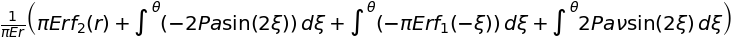

In [ ]:
v = Function('v')(r,theta)
lhs = diff(v,theta)
rhs = r*ep_tt - u_interim
f2 = Function('f_2')
eq2 = Eq(lhs,rhs)
sol2 = pdsolve(eq2,solvefun=f2)
v_interim = sol2.rhs
v_interim

We note that there are two integrals of $sin(2\xi)$. We will substitute $\xi = \theta$ to solve the integrals and rewrite `v_interim`.
We will also replace $\int f_1(-\theta)d\theta$ = $F_1(\theta)$ in `u_interim` and `v_interim`. So, new expressions for $u$ and $v$ are:

In [ ]:
F1 = Function('F_1')(theta)
f2 = Function('f_2')(r)
v_interim2 = f2 - F1 - 2*P*a*(1-nu)/(pi*E*r)*integrate(sin(2*theta), theta)
u_interim2 = diff(F1) + 2*P*a/(pi*E*r)*sin(2*theta)
display(Math(r'u(r, \theta) = {}'.format(latex(u_interim2))))
display(Math(r'v(r,\theta) = {}'.format(latex(v_interim2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now, we substitute the forms of $u(r,\theta)$ and $v(r,\theta)$ (stored, respectively, in `u_interim` and `v_interim`) in the final strain-displacement relation involving $\varepsilon_{r\theta}$ to obtain an equation involving both the unknown functions $f_1(\theta)$ and $f_2(r)$:

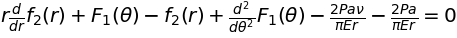

In [ ]:
lhs = (r*diff(v_interim2,r) - v_interim2 + diff(u_interim2,theta)) - 2*r*ep_rt
rhs = 0
eq3 = Eq(lhs,rhs)
eq3.simplify()

From this equation, we extract the following two equations:
\begin{align*}
r\frac{df_2(r)}{dr} - f_2(r) - (1+\nu)\frac{2Pa}{\pi Er} &= C_0, \\
\frac{d^2F_1(\theta)}{d\theta^2} + F_1(\theta) &= -C_0 \\
\end{align*}

Consider the first equation. We replace $f_2(r)$ by $f_r(r)$

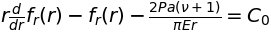

In [ ]:
fr = Function('f_r')(r)
C0 = symbols("C_0")
lhs = r*diff(fr) - fr - (1+nu)*(2*P*a)/(pi*E*r)
rhs = C0
eq = Eq(lhs, rhs)
eq

Solution to this equation is given by:

In [ ]:
sol = dsolve(eq)
sol

We use $F$ instead of $C_1$, thus:

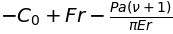

In [ ]:
F = symbols('F')
fr = F*r - C0 - (1+nu)*(P*a)/(pi*E*r)
fr

Considering the second equation:

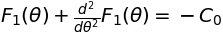

In [ ]:
F1 = Function(r'F_1')(theta)
lhs = F1 + diff(F1,theta,2)
rhs = -C0
eq = Eq(lhs,rhs)
eq

Solution is given by:

In [ ]:
sol = dsolve(eq)
F1 = sol.rhs
sol

We use $H$ and $K$ in place of $C_1$ and $C_2$ respectively. Thus:

In [ ]:
F1 = H*sin(theta) + K*cos(theta) - C0
F1

Since, $\int f_1(-\theta)d\theta$ = $F_1(\theta)$ we get $f_1(-\theta)$ as:

In [ ]:
ft = H*sin(theta) - K*cos(theta)
ft

Then, expression of $u(r, \theta)$ becomes:

In [ ]:
u_semi = ft + 2*P*a/(pi*E*r)*sin(2*theta)
u_semi

Expression of $v(r, \theta)$ becomes:

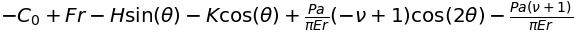

In [ ]:
v_semi = fr - integrate(ft, theta) + P*a*(1-nu)/(pi*E*r)*cos(2*theta)
v_semi

We note that there is an anti symmetry of forces around $y$ = $-\frac{a}{2}$. We assume constraint of semi-infinite plate is such that points on $y = -\frac{a}{2}$ have no lateral displacement. Furthermore, we assume a point at a distance $d$ from $y$ axis on the line $y = -\frac{a}{2}$ does not move vertically.

We get the following boundary conditions:
\begin{align*}
v &= 0, \quad \text{$\forall$ $rsin(\theta)$ = $-\frac{a}{2}$} \\
u &= 0, \quad \text{at r = $\sqrt{d^2+\frac{a^2}{4}}$ and $tan(\theta)$ = $-\frac{a}{2d}$} \\
\end{align*}

Solving first boundary equation:

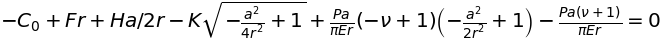

In [ ]:
lhs = expand_trig(v_semi).subs([(sin(theta), -a/(2*r)), (cos(theta), sqrt(1 - a**2/(2*r)**2))])
rhs = 0
eq1 = Eq(lhs, rhs)
eq1

For small $a$, we will neglect higher powers of $a$ to get:

In [ ]:
lhs = -C0 + F*r + H*a/(2*r) - K - 2*nu*P*a/(pi*E*r)
rhs = 0
eq1 = Eq(lhs, rhs)
eq1

From this eq, we can directly say,
$K = C_0$, $F = 0$ and $H = \frac{4P \nu}{\pi E}$

Now, considering second boundary condition:

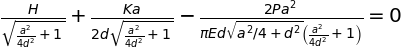

In [ ]:
d = symbols('d')
lhs = expand_trig(u_semi).subs([(theta, atan(-a/(2*d))), (r, sqrt(d**2 + a**2/4))])
rhs = 0
eq2 = Eq(lhs, rhs)
eq2

Again, neglecting higher powers of $a$. We get $K = \frac{2dH}{a}$.
So, $C_0 = K = \frac{8dP \nu}{\pi aE}$.

Thus, Final values of $u$ and $v$ are:

In [ ]:
Ksol = 8*d*P*nu/(pi*a*E)
Hsol = 4*P*nu/(pi*E)
u_sol = u_semi.subs([(H, Hsol), (K, Ksol)])
v_sol = v_semi.subs([(C0, Ksol), (F, 0), (H, Hsol), (K, Ksol)])
display(Math(r'u(r,\theta) = {}'.format(latex(u_sol))))
display(Math(r'v(r,\theta) = {}'.format(latex(v_sol))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---
**Reference:** Timoshenko & J. N. Goodier, Theory of Elasticity, Vol. 2, P. 89, 1951

**Work Description**- \\
**Kashish**: Derived airy stress function for the problem, $\phi_1$ (only on paper, not jupyter notebook). Derived complete expressions of $u$ and $v$ in general terms and then imposing boundary conditions (on jupyter notebook).
<br>
**Anurag**: Derived the airy stress function $\phi_1$ (in Jupyter notebook) for the couple $P$ at distance $a$ and find the $\sigma_{rr},\sigma_{tt}$ and $\sigma_{rt}$ along with strain and worked on the Latex part.
<br>
**Ved**: Derived the airy stress function (in Jupyter notebook) when a point load,  $P$  acts vertically on the infinite half space to get the generalized behaviour and finding of constants $A, B, C, D$